# Variational Monte Carlo

Imagine we have a quantum harmonic osscilator were the Hamiltonian is
$$\hat{H} = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2 $$

In oreder to solve this, we guess a wave function, and then using Monte Carlo methods, we try to find the lowest energy state.

Now imagine our wave function is

$$ \psi \propto e^{-\lambda x^2} $$

Then the local energy of the system at each point would be

$$ E_L = \frac{H \psi}{\psi} = \lambda + x^2 (\frac{1}{2} - 2\lambda^2) $$

## (a)

Write a Metropolice algorithm to generate values for $x$ as a function of $\lambda$. Then plot the PDF alongside with the analitycal function for $P(x) = \psi^2(x)$ to confirm that they match.

P.S. in quantum mechanics, the probability function is always given as $\psi^2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
sns.set_style('white')

In [3]:
def Variational_Monte_Carlo(steps,equlibration_steps,la_interval,la_step,interval):
    def Psi(x, la):
        return np.exp(-2 * la * x**2)

    def W(interval, x_i, la):
        x_trial = x_i+np.random.uniform(-interval,interval,1)[0]
        return np.power(Psi(x_trial,la)/Psi(x_i,la),2),x_trial

    def Metropolice(steps,equlibration,interval,la,x_i):
        x,e,ee = [],[],[]
        for i in range(steps):
            w,x_trial = W(interval, x_i, la)
            if w>1 : x_i = x_trial
            elif np.random.uniform()<=w: x_i = x_trial

            if equlibration<steps:
                x.append(x_i)
                el = la+x_i**2*(1/2-2*la**2)
                e.append(el)
                ee.append(el**2)
        return np.mean(e), np.mean(ee), x_i

    x_i = np.random.randint(10)  #initial 
    E,EE,Evar,X = [],[],[],[]
    Lambda = np.linspace(la_interval[0],la_interval[1],la_step)
    for la in Lambda:
        e,ee,x_i = Metropolice(steps,equlibration_steps,interval,la,x_i)
        E.append(e) ; EE.append(ee - e**2) ; X.append(x_i) ; Evar.append(ee)
    return E,EE,Evar,X,Lambda

In [6]:
n    = 10000
bins = 100

In [7]:
%%time
E,EE,Evar,X,la = Variational_Monte_Carlo(n+n//2,n//2,[0,3],1000,1)

CPU times: user 4min 50s, sys: 26.8 s, total: 5min 17s
Wall time: 4min 57s


In [8]:
def normalize(Q):
    norm, dif = [], abs(np.max(Q)-np.min(Q))
    for i in Q: norm.append((i-np.min(Q))/dif)
    return norm

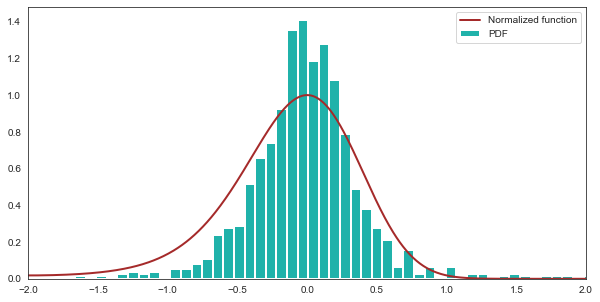

In [11]:
def P(x, la):
    return np.exp(-2 * la * x**2)

fig = plt.figure(figsize=(10, 5))
plt.hist(X,bins=400,density=True,color='lightseagreen',lw=2,label='PDF')
xx = np.linspace(-3,3,len(la))
plt.plot(xx,normalize(P(xx,la)),color='brown',lw=2,label='Normalized function')
plt.xlim(-2, 2)

plt.legend(loc='upper right')
plt.show()

## (b)

Write two functions to calculate the expectation value $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ as a function of $\lambda$.

I did that in part a. 

## (c)

Generate a uniform sample of values for $\lambda$, plot the mean and the variance and find the best value for $\lambda$ (The minimum energy value).

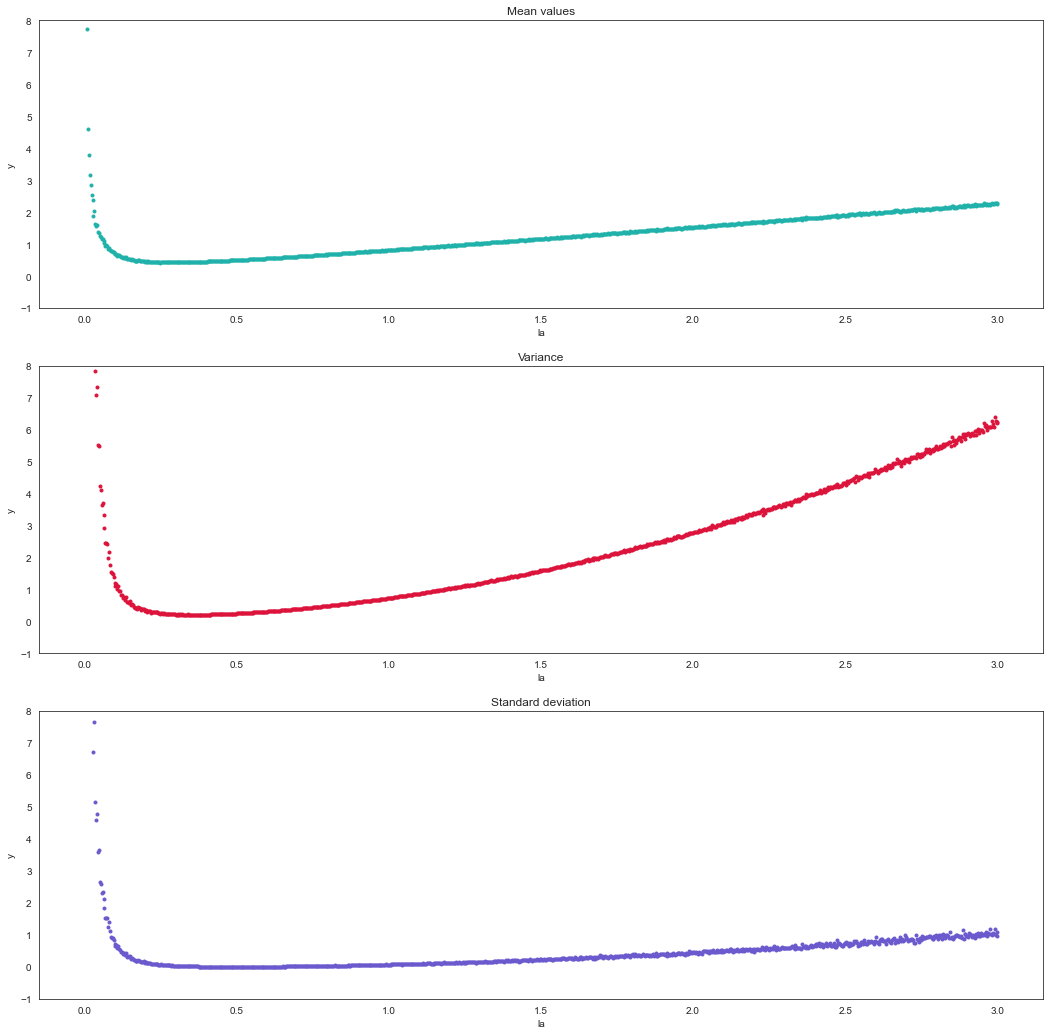

In [14]:
fig = plt.figure(figsize=(18, 18))
for x,y,axis,c,name in zip([la,la,la],[E,Evar,EE],range(1,4),['lightseagreen','crimson','slateblue'],['Mean values','Variance','Standard deviation']):
    ax =  fig.add_subplot(3, 1, axis )
    y=np.array(y)
    plt.ylim(-1,8)
    plt.scatter(x,y,color=c,marker='.')
    plt.xlabel('la') ; plt.ylabel('y')
    plt.title(name)